#### About Walmart ####

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


#### Business Problem ####

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
# import required modules
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
current_palette = sns.color_palette('colorblind')
from datetime import datetime,timedelta,date

In [2]:
# read data
walmart_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [3]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
# Checking the dimensions of the dataset
print("Rows : {} ,Columns : {}".format(walmart_df.shape[0],walmart_df.shape[1]))

Rows : 550068 ,Columns : 10


In [5]:
walmart_df.info() #Display Details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
walmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### The dataset doesn't have any null values!

In [7]:
walmart_df.describe() #Statistical Summary

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
# Covert User Id, Occupation, Marital_Status and Product_Category into object data type
cols = ['User_ID','Occupation', 'Marital_Status', 'Product_Category']
walmart_df[cols] = walmart_df[cols].astype('object')

In [9]:
walmart_df.describe() #Statistical Summary

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


##### Standard Deviation is quite high, which could indicate the prescence of outliers. For further confirmation, we can check using box-plots

## 1.Univariate Analysis

In [10]:
unwanted_cols = {"Product_ID", "User_ID"}
cat_cols = [ele for ele in walmart_df.select_dtypes(include=['object']).columns 
            if ele not in unwanted_cols] #Categorical Columns without ids

for col in cat_cols: #Filtering out non-numeric columns
    if col in ["User_ID","Product_ID"]:
        continue
    print("Value Counts for {}".format(col))
    print(round(walmart_df[col].value_counts(normalize=True)*100,2)) #Displaying frequency distribution of categorical Variables
    print("----------------------------")

Value Counts for Gender
M    75.31
F    24.69
Name: Gender, dtype: float64
----------------------------
Value Counts for Age
26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: Age, dtype: float64
----------------------------
Value Counts for Occupation
4     13.15
0     12.66
7     10.75
1      8.62
17     7.28
20     6.10
12     5.67
14     4.96
2      4.83
16     4.61
6      3.70
3      3.21
10     2.35
5      2.21
15     2.21
11     2.11
19     1.54
13     1.40
18     1.20
9      1.14
8      0.28
Name: Occupation, dtype: float64
----------------------------
Value Counts for City_Category
B    42.03
C    31.12
A    26.85
Name: City_Category, dtype: float64
----------------------------
Value Counts for Stay_In_Current_City_Years
1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64
----------------------------
Value Counts for Marital_Status
0    59.03
1    40.97
Name: Ma

In [11]:
#Summarizing the number of unique values in each column
unique_counts=pd.DataFrame.from_records([(col,walmart_df[col].nunique()) for col in cat_cols],columns=['Column_Name','Num_Unique'])
unique_counts.sort_values(by='Num_Unique')

,Column_Name,Num_Unique
0,Gender,2
5,Marital_Status,2
3,City_Category,3
4,Stay_In_Current_City_Years,5
1,Age,7
6,Product_Category,20
2,Occupation,21


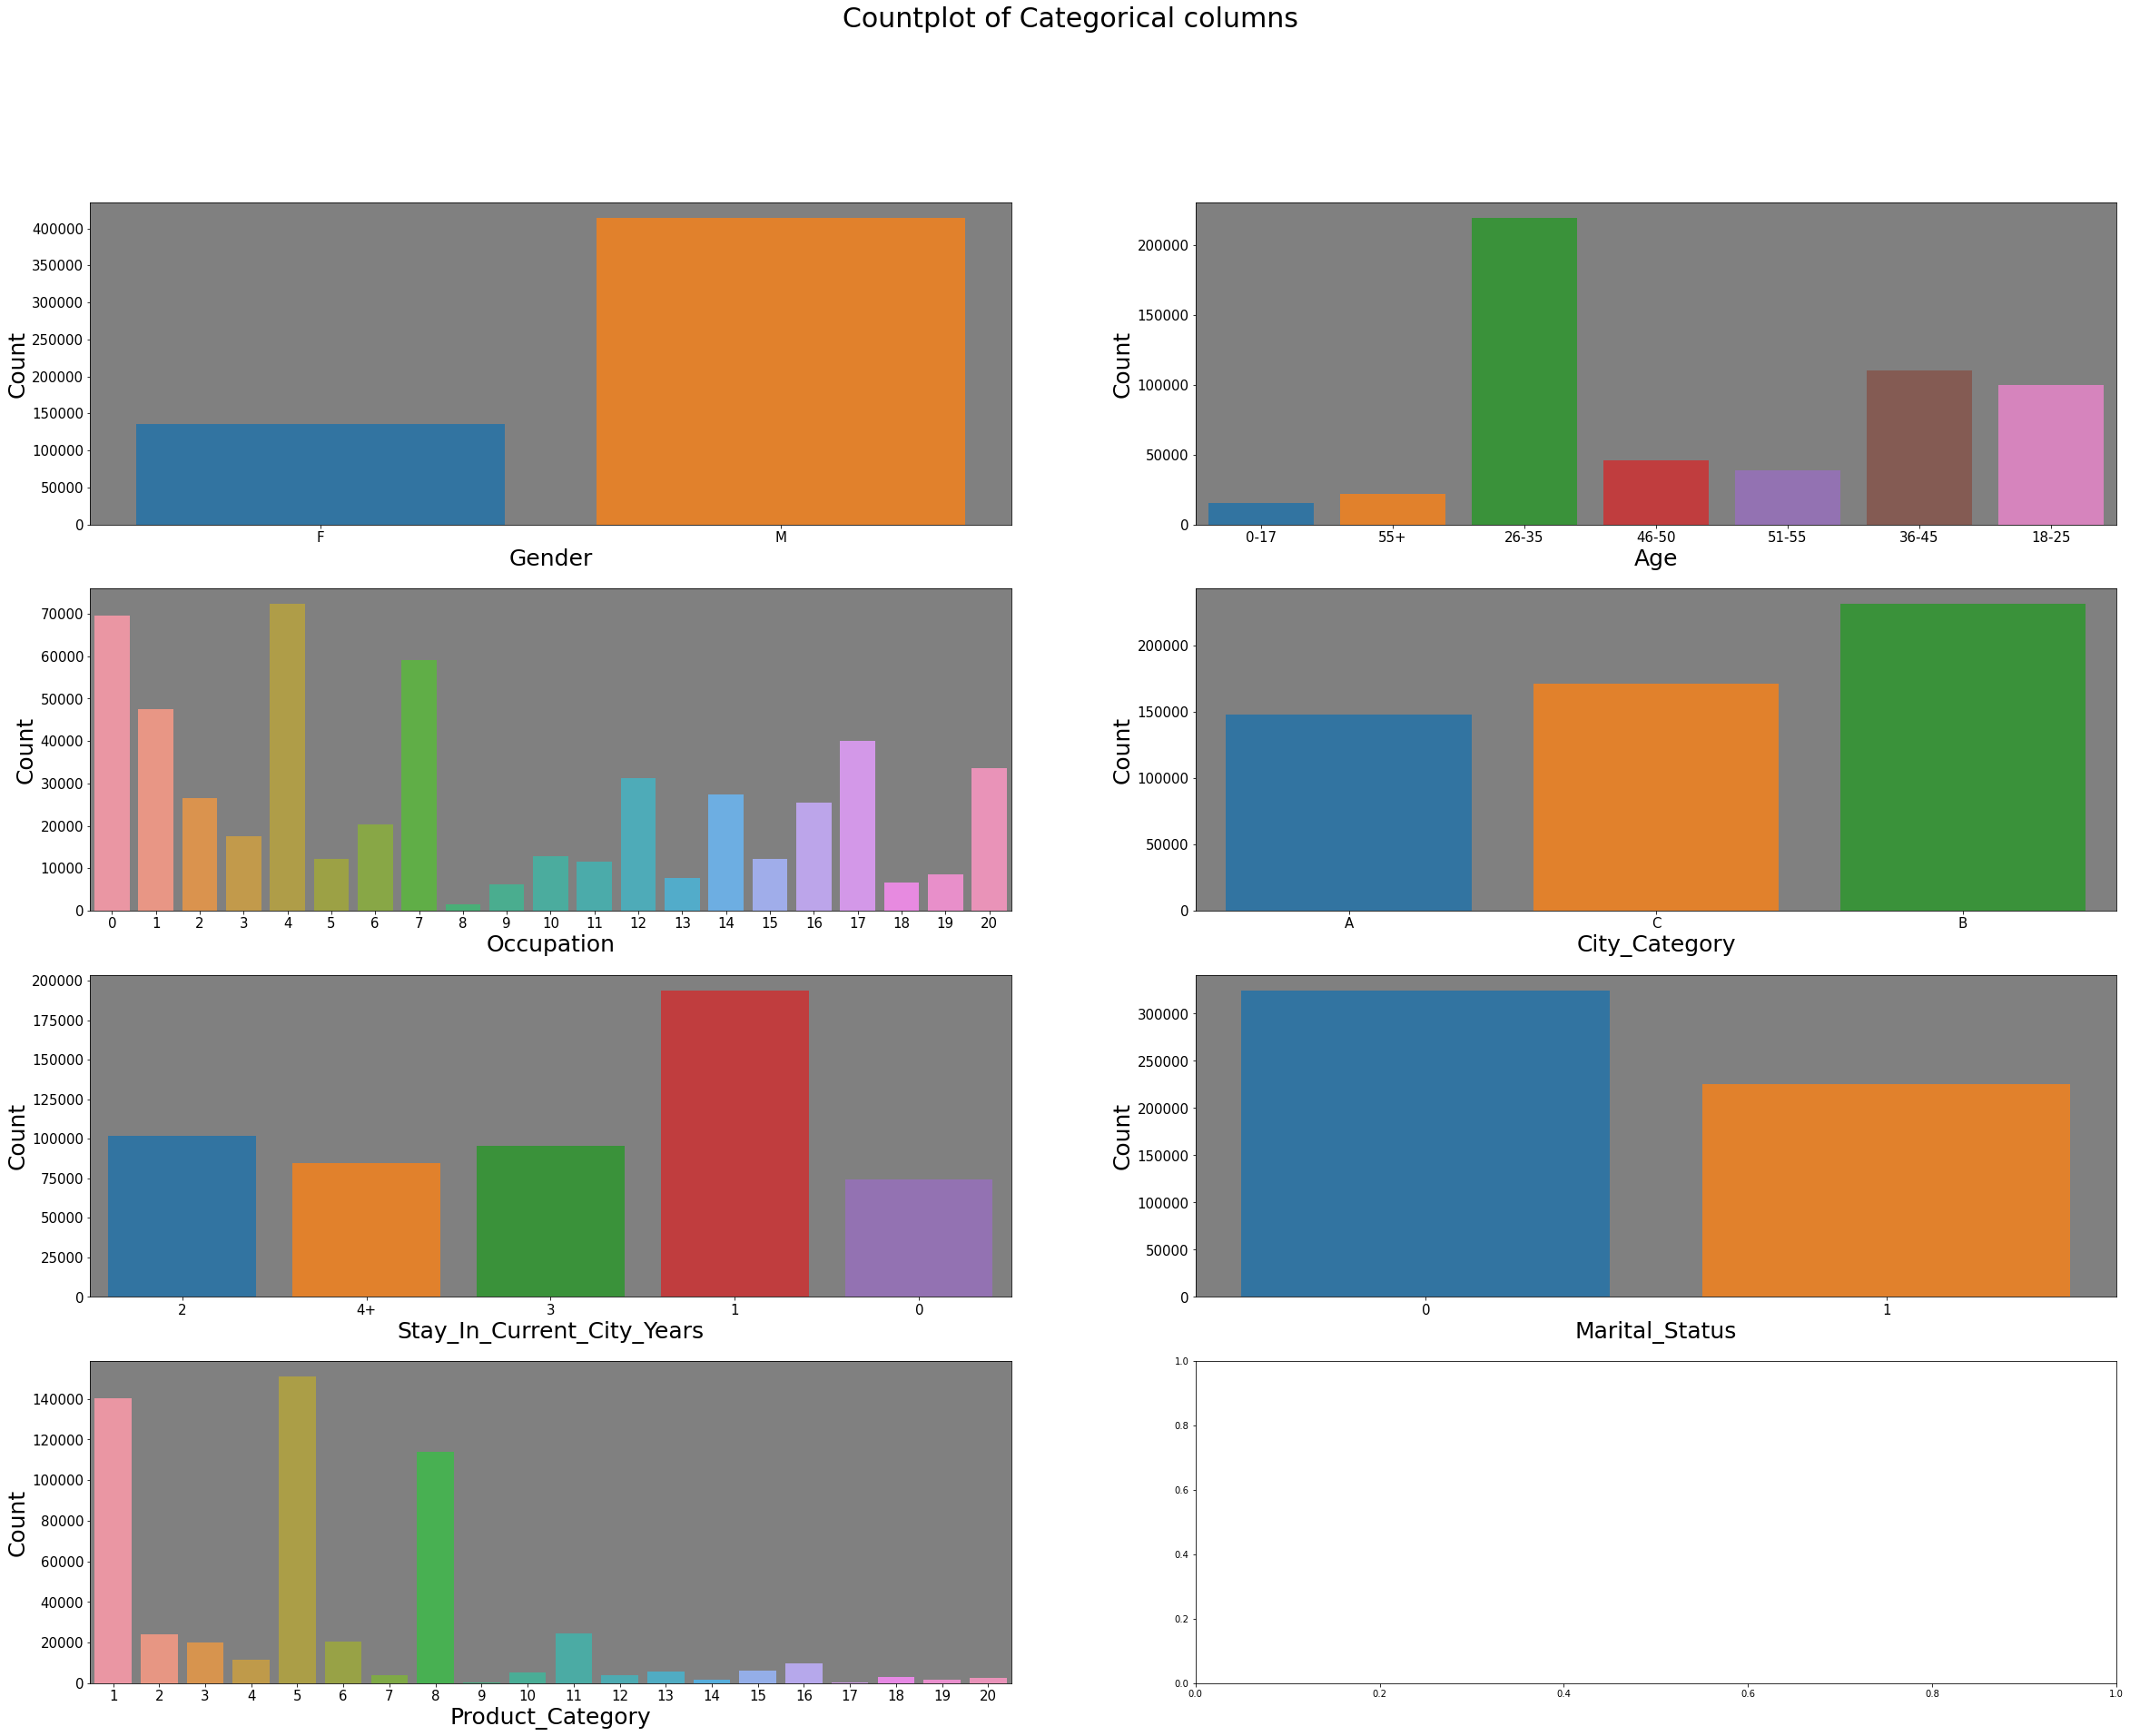

In [12]:
cat_columns_len = len(cat_cols) #Length of categorical columns
plt.rcParams['figure.figsize'] = (40, 30)
fig, axs = plt.subplots(int(round(cat_columns_len/2,0)), 2) # Create subplots

for i,col in enumerate(cat_cols): #Iterate through each categorical column
    sns.countplot(data=walmart_df, x=col, ax=axs[i//2,i%2])
    axs[i//2,i%2].set_xlabel(col,fontsize=25)
    axs[i//2,i%2].set_ylabel("Count",fontsize=25)
    axs[i//2,i%2].tick_params(labelsize=15)
    axs[i//2,i%2].set_facecolor("grey")

fig.suptitle('Countplot of Categorical columns', fontsize=30)
plt.show()

#### Observations

<br>1.Approximately 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45) </br>
<br>2. 75% : Male and 25% : Female </br>
<br>3. 60% Single, 40% Married </br>
<br>4.35% Staying in the city for 1 year, 18% for 2 years, 17% for 3 years </br>
<br>5. There are 20 different product categories </br>
<br>6.There are 21 differnent types of occupations </br>
<br>7. Around 42% stay in city type B </br>
<br>8. Product Category 1,5,8 have the highest puchasing frequency </br>

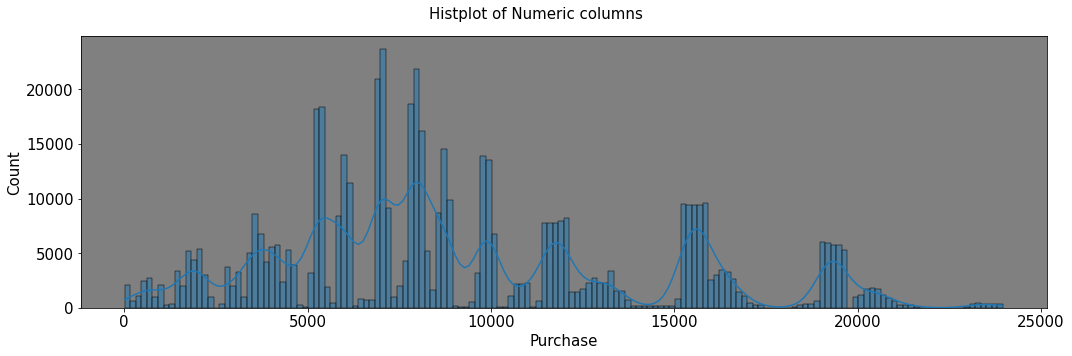

In [13]:
num_columns = len(walmart_df.select_dtypes(include=['int']).columns) 

plt.rcParams['figure.figsize'] = (15, 5)
fig, axs = plt.subplots(num_columns, 1)

for i,col in enumerate(walmart_df.select_dtypes(include=['int']).columns):
    sns.histplot(data=walmart_df, x=col, kde=True, ax=axs)
    axs.set_xlabel(col,fontsize=15)
    axs.set_ylabel("Count",fontsize=15)
    axs.tick_params(labelsize=15)
    axs.set_facecolor("grey")
fig.suptitle('Histplot of Numeric columns', fontsize=15)
plt.tight_layout()
plt.show()

#### Distribution is multimodal, so need to bin the Purchase column for better insights

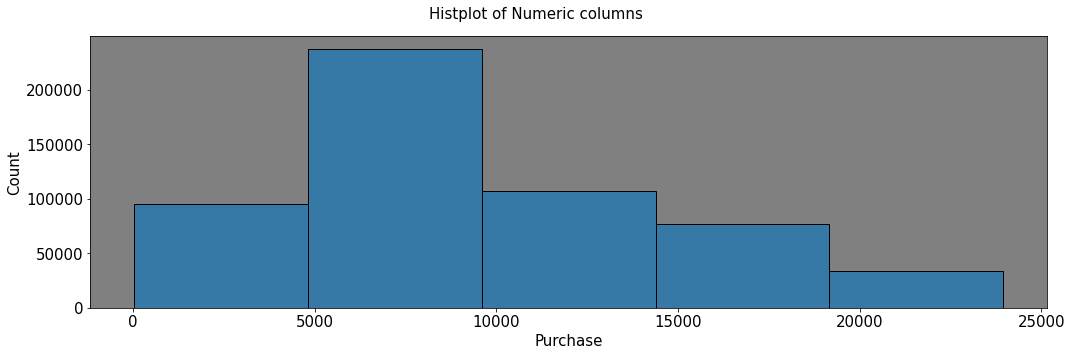

In [14]:
plt.rcParams['figure.figsize'] = (15, 5)
fig, axs = plt.subplots(num_columns, 1)

for i,col in enumerate(walmart_df.select_dtypes(include=['int']).columns):
    sns.histplot(data=walmart_df, x=col, bins=5, ax=axs)
    axs.set_xlabel(col,fontsize=15)
    axs.set_ylabel("Count",fontsize=15)
    axs.tick_params(labelsize=15)
    axs.set_facecolor("grey")
fig.suptitle('Histplot of Numeric columns', fontsize=15)
plt.tight_layout()
plt.show()

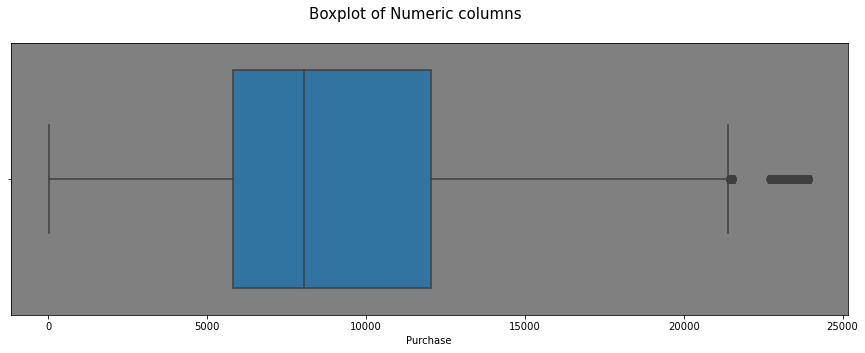

In [15]:
plt.rcParams['figure.figsize'] = (15, 5)
fig, axs = plt.subplots(num_columns, 1)
for i,col in enumerate(walmart_df.select_dtypes(include=['int']).columns):
    sns.boxplot(data=walmart_df, x=col, ax=axs)
    axs.set_xlabel(col,fontsize=10)
    axs.tick_params(labelsize=10)
    axs.set_facecolor("grey")
fig.suptitle('Boxplot of Numeric columns', fontsize=15)
plt.show()

#### Observations

<br>1.Purchase has outliers </br>
<br>2. Most of the Purchases were in the range (5-10)k </br>

## 2.Bivariate Analysis

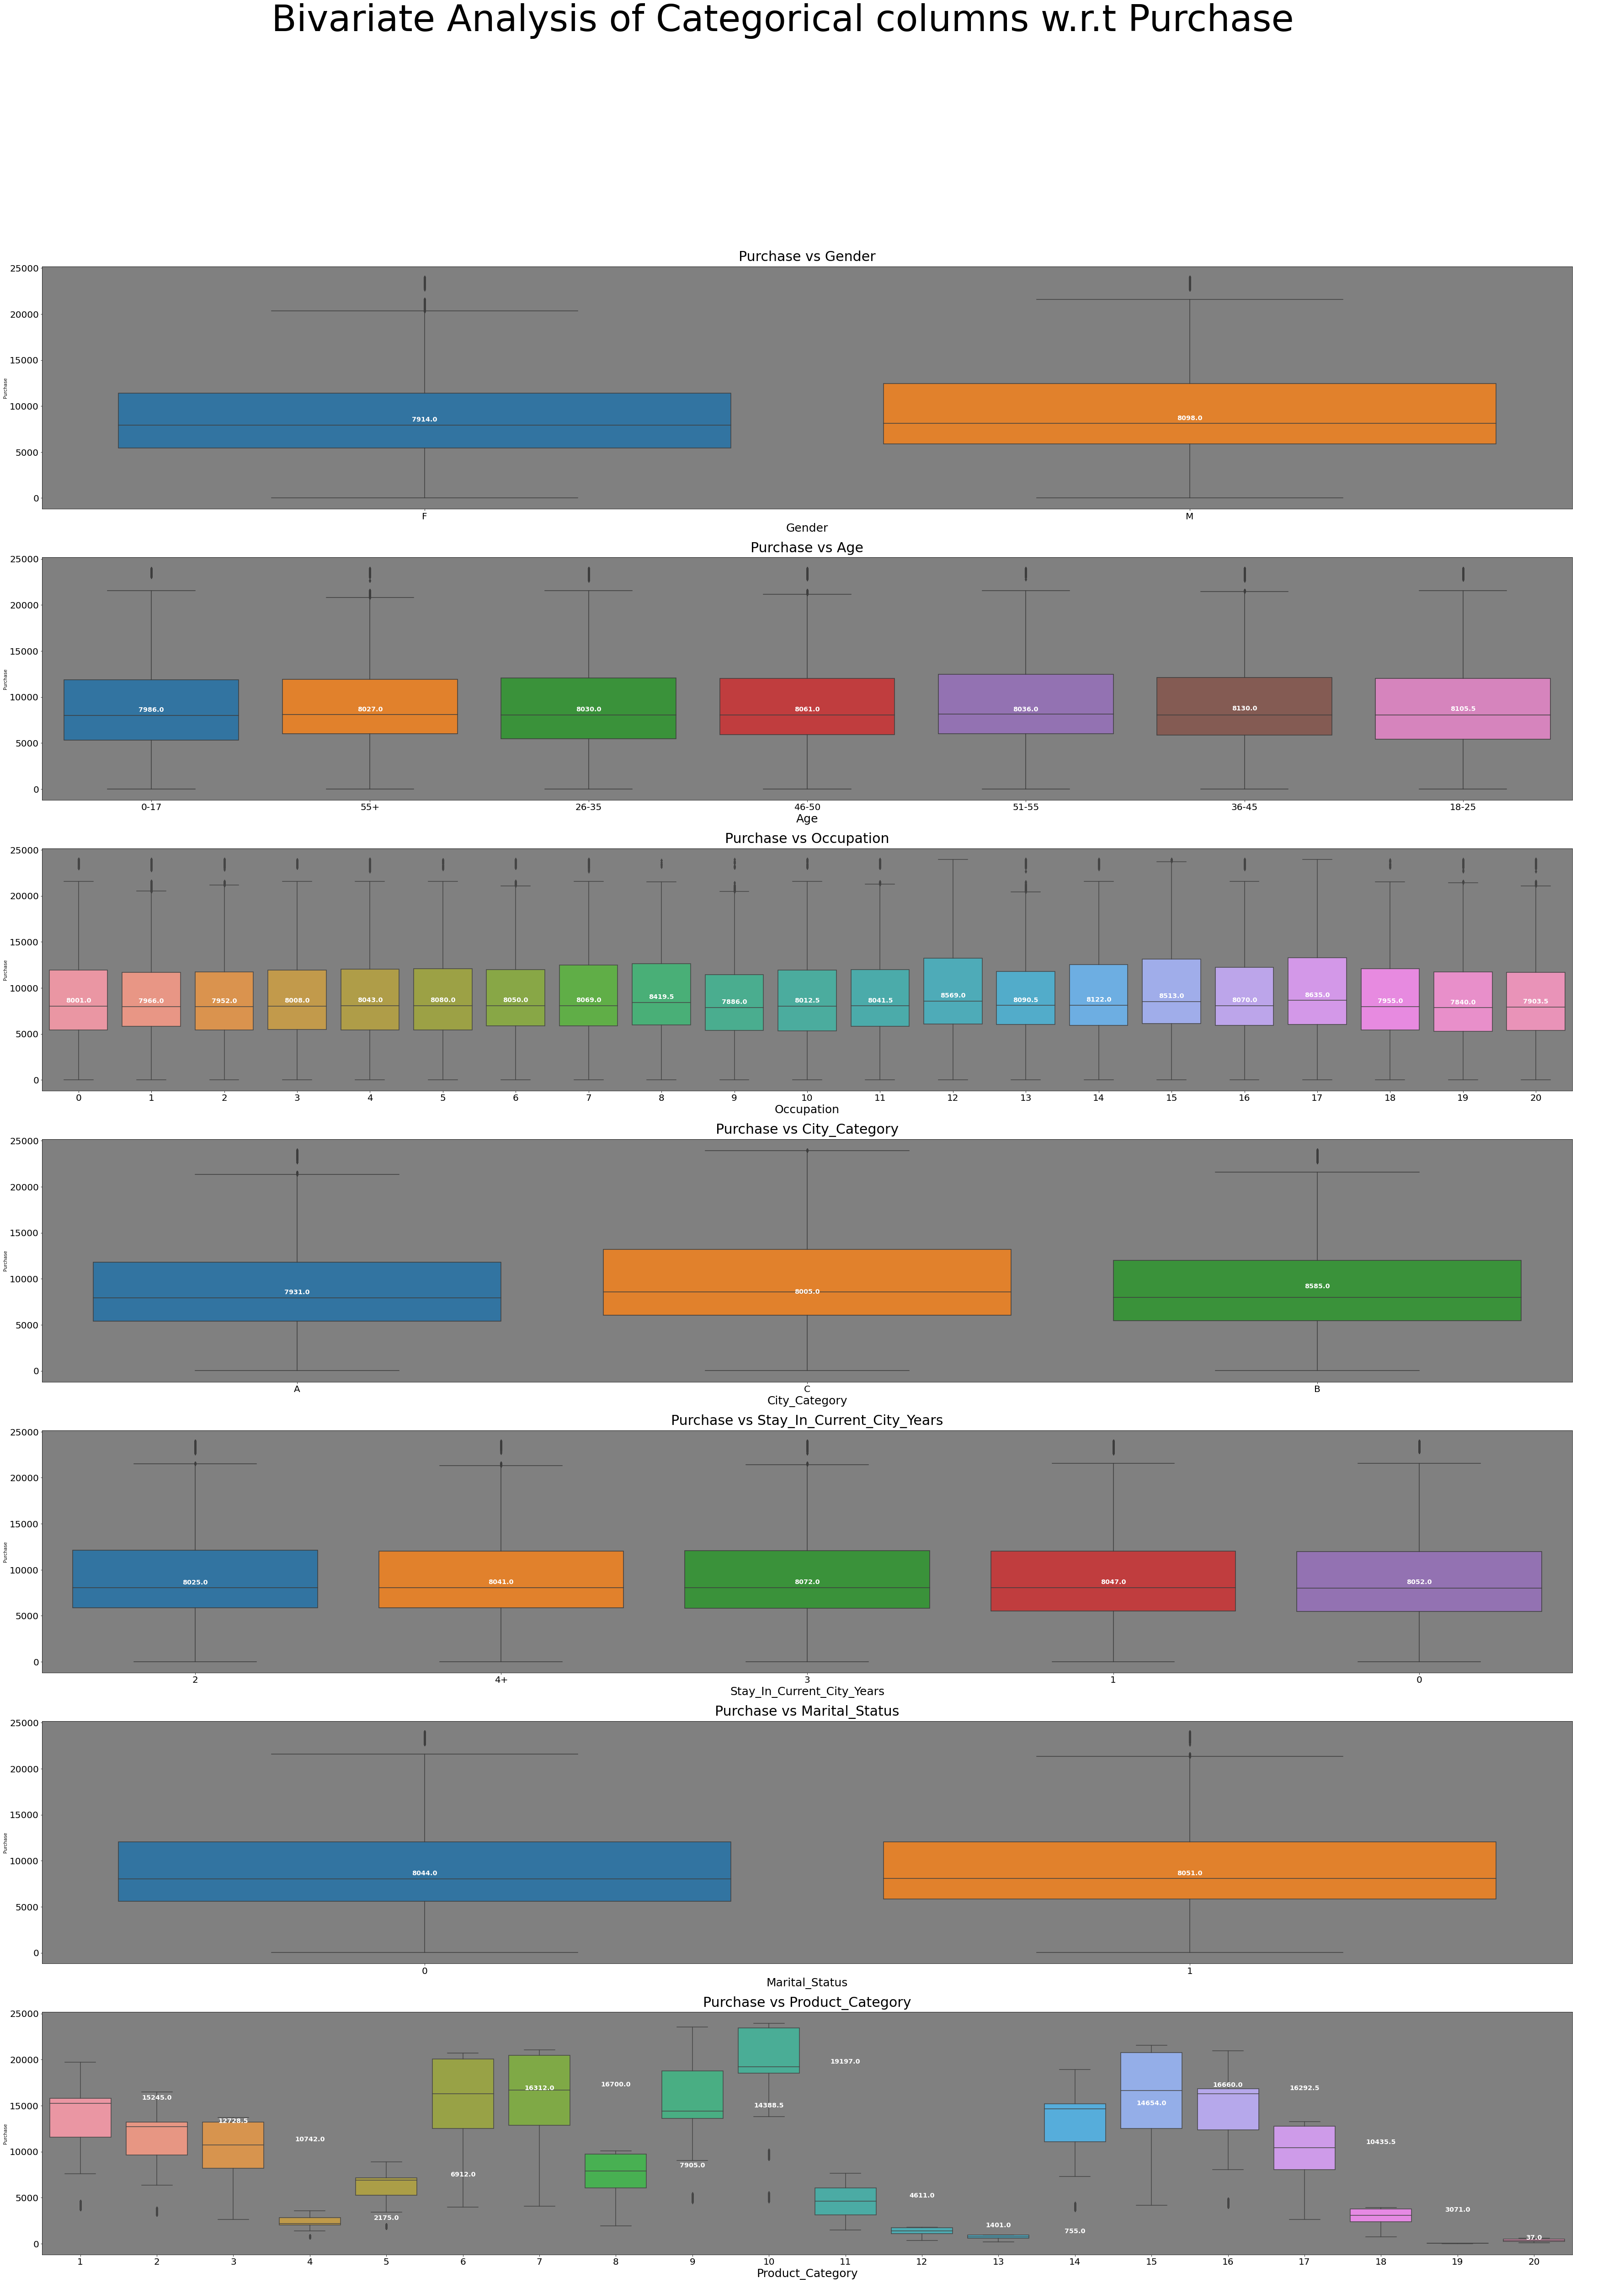

In [16]:
plt.rcParams['figure.figsize'] = (60, 80)
fig, axs = plt.subplots(len(cat_cols), 1)
for i,col in enumerate(cat_cols):
    box_plot = sns.boxplot(data = walmart_df, x = col,y = "Purchase", ax=axs[i])
    medians = walmart_df.groupby(col)['Purchase'].median()
    vertical_offset = walmart_df['Purchase'].median() * 0.05 # offset from median for display
    
    # Display Median values
    for xtick in box_plot.get_xticks():
        if col == "Product_Category":
            xtick +=1
        box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-large',color='w',weight='semibold')
    
    # Set up axis
    axs[i].set_title("Purchase vs {}".format(col), pad=12, fontsize=30)
    axs[i].set_facecolor("grey")
    axs[i].set_xlabel(col,fontsize=25)
    axs[i].tick_params(labelsize=20)

fig.suptitle('Bivariate Analysis of Categorical columns w.r.t Purchase', fontsize=80)
plt.show()

#### Observations

<br>The median value for purchase doesn't vary a lot for Males/Females, Married/Unmarried, Age or City Category </br>
<br>The median value for purchase varies for Product Category,though the products could be priced differently and hence the variation </br>
<br> Need to look at average spends per features, to draw insights </br>

## 3.Confidence Intervals

In [20]:
def create_sample_of_means(sample_size,df,attr):
    '''
    This function runs a simulation to create a Gaussian distribution of means from 
    1000 iterations of taking samples of a given sample size
    
    Returns a dictionary of sample means of 1000 iterations for each value of the attribute (Gender,Age etc)
    '''
    
    df_list = {val:df[df[attr]==val] for val in df[attr].unique()}  # Dictionary having dataframe for each value of attribute
    means_list = {key:[df_list[key].sample(sample_size,replace=True)['Purchase'].mean() 
                       for _ in range(1000)] for key in df_list.keys()} #Dictionary of sample means for each value of the attribute
    
    return means_list

In [95]:
def display_hist_sample_of_means(list_sample_means,attr):
    '''
    This function displays the histogram formed by 
    1000 iterations of taking samples of a given sample size
    '''
    unique_attr = len(list_sample_means) #Length of categorical columns
    plt.rcParams['figure.figsize'] = (20, 20)
    fig, axs = plt.subplots(int(round(unique_attr/2,0)), 2) # Create subplots
    
    if unique_attr <= 2:
        for i,key in enumerate(list_sample_means) : #Iterate through each categorical column
            axs[i].hist(list_sample_means[key], bins=40)
            axs[i].set_xlabel(key,fontsize=25)
            axs[i].set_ylabel("Count",fontsize=25)
            axs[i].tick_params(labelsize=15)
            axs[i].set_facecolor("grey")
    else:
        for i,key in enumerate(list_sample_means) : #Iterate through each categorical column
            axs[i//2,i%2].hist(list_sample_means[key], bins=40)
            axs[i//2,i%2].set_xlabel(key,fontsize=10)
            axs[i//2,i%2].set_ylabel("Count",fontsize=10)
            axs[i//2,i%2].tick_params(labelsize=10)
            axs[i//2,i%2].set_facecolor("grey")

    fig.suptitle('Distribution of Means for {}'.format(attr), fontsize=30)
    plt.show()

In [37]:
### Estimating Population mean and Standard Error
def populaton_mean_std(list_sample_means,attr):
    '''
    This function calculate and prints the Population mean and standard Error
    '''
    pop_mean = {key:np.mean(list_sample_means[key]) for key in list_sample_means.keys()}
    pop_std_err = {key:np.std(list_sample_means[key])/np.sqrt(len(list_sample_means[key])) for key in list_sample_means.keys()}
    
    for key in list_sample_means.keys():
        print ("Population mean for {},{} is {:.0f}".format(attr,key,np.mean(pop_mean[key])))
        print ("Population Standard Error for {},{} is {:.0f}".format(attr,key,pop_std_err[key]))
    
    return pop_mean,pop_std_err

In [46]:
def confidence_intervals (pop_mean, pop_std_err,attr,conf_int,conf_perc):
    '''
    Prints the range in which population mean will lie for a given attribute
    '''
    for key in pop_mean.keys():
        upper_limit = pop_mean[key]+conf_int*pop_std_err[key]
        lower_limit = pop_mean[key]-conf_int*pop_std_err[key]
        
        print ("Population Mean for {},{} at {} confidence interval lies in [{:.0f},{:.0f}]".
               format(attr,key,conf_perc,lower_limit,upper_limit))

#### 3.1 Confidence Intervals for Gender

In [76]:
# Prepare a dataframe for further analysis
purchase_amt_df = walmart_df.groupby(['User_ID', 'Gender'])[['Purchase']].sum().reset_index()
purchase_amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [18]:
# Print Average Amounts spent by Males and Females
print("Average amount spend by Male customers: {:.0f}".format(purchase_amt_df[purchase_amt_df['Gender']=='M']['Purchase'].mean()))
print("Average amount spend by Female customers: {:.0f}".format(purchase_amt_df[purchase_amt_df['Gender']=='F']['Purchase'].mean()))

Average amount spend by Male customers: 925344
Average amount spend by Female customers: 712024


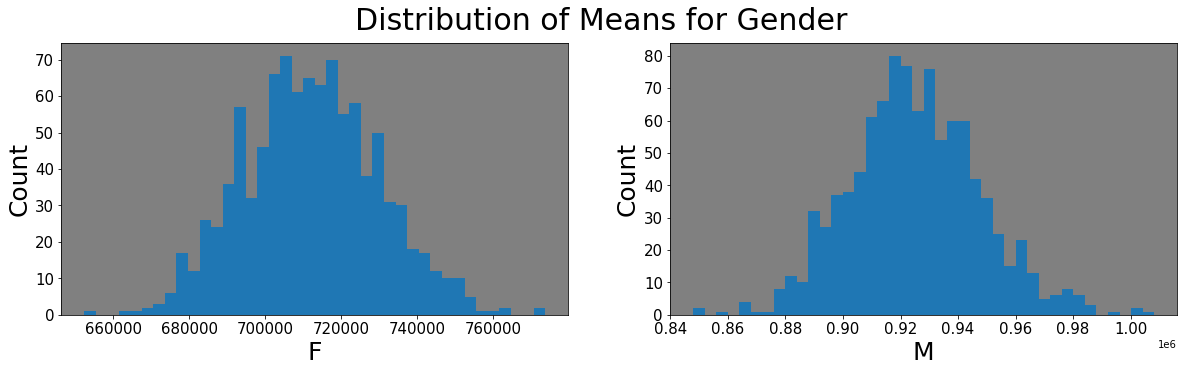

In [28]:
sample_means = create_sample_of_means(2000,purchase_amt_df,'Gender')
display_hist_sample_of_means(sample_means,'Gender')

In [39]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Gender')

Population mean for Gender,F is 712071
Population Standard Error for Gender,F is 562
Population mean for Gender,M is 924934
Population Standard Error for Gender,M is 717


In [48]:
confidence_intervals(pop_mean, pop_std_err,'Gender',1.645,"90%")

Population Mean for Gender,F at 90% confidence interval lies in [711146,712996]
Population Mean for Gender,M at 90% confidence interval lies in [923756,926113]


In [47]:
confidence_intervals(pop_mean, pop_std_err,'Gender',1.96,"95%")

Population Mean for Gender,F at 95% confidence interval lies in [710969,713173]
Population Mean for Gender,M at 95% confidence interval lies in [923530,926339]


In [49]:
confidence_intervals(pop_mean, pop_std_err,'Gender',2.576,"99%")

Population Mean for Gender,F at 99% confidence interval lies in [710623,713520]
Population Mean for Gender,M at 99% confidence interval lies in [923088,926780]


#### Analysing the impact of increasing and decreasing the sample size

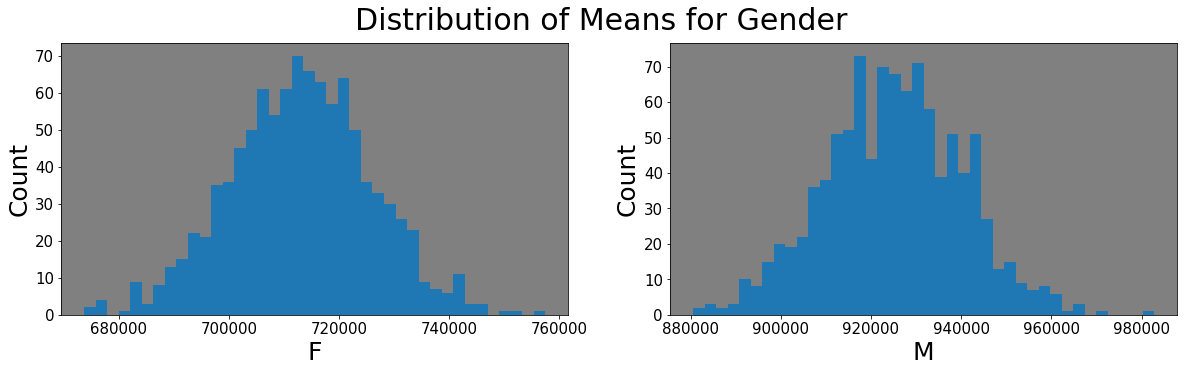

In [79]:
# Sample size is increased to 4000 from 2000
sample_means = create_sample_of_means(4000,purchase_amt_df,'Gender')
display_hist_sample_of_means(sample_means,'Gender')

In [80]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Gender')

Population mean for Gender,F is 713074
Population Standard Error for Gender,F is 405
Population mean for Gender,M is 925085
Population Standard Error for Gender,M is 482


In [81]:
confidence_intervals(pop_mean, pop_std_err,'Gender',1.96,"95%")

Population Mean for Gender,F at 95% confidence interval lies in [712280,713869]
Population Mean for Gender,M at 95% confidence interval lies in [924140,926030]


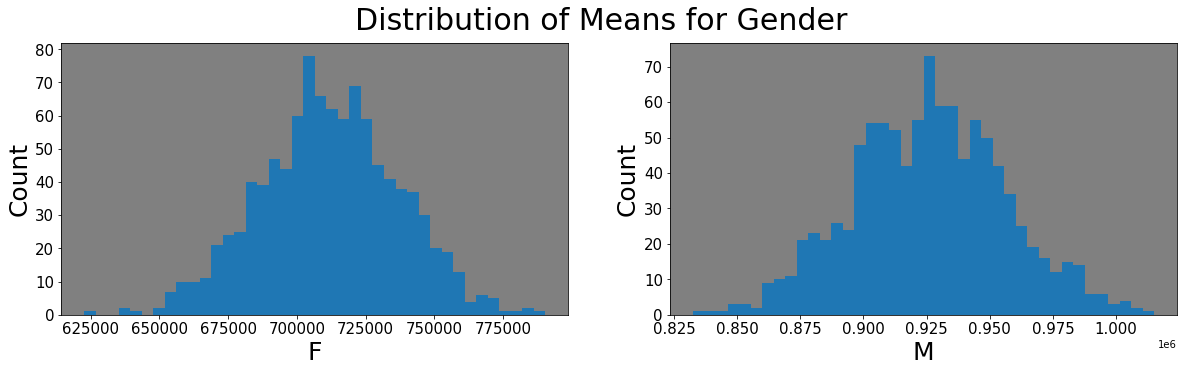

In [82]:
# Sample size is decreased to 1000 from 2000
sample_means = create_sample_of_means(1000,purchase_amt_df,'Gender')
display_hist_sample_of_means(sample_means,'Gender')

In [83]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Gender')

Population mean for Gender,F is 711781
Population Standard Error for Gender,F is 799
Population mean for Gender,M is 925950
Population Standard Error for Gender,M is 961


In [84]:
confidence_intervals(pop_mean, pop_std_err,'Gender',1.96,"95%")

Population Mean for Gender,F at 95% confidence interval lies in [710214,713348]
Population Mean for Gender,M at 95% confidence interval lies in [924066,927835]


#### 3.2 Confidence Intervals for Marital_Status

In [85]:
# Prepare a dataframe for further analysis
purchase_amt_df = walmart_df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum().reset_index()
purchase_amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [52]:
# Print Average Amounts spent by Married and Unmarried
print("Average amount spend by Married customers: {:.0f}".format(purchase_amt_df[purchase_amt_df['Marital_Status']==1]['Purchase'].mean()))
print("Average amount spend by Single customers: {:.0f}".format(purchase_amt_df[purchase_amt_df['Marital_Status']==0]['Purchase'].mean()))

Average amount spend by Married customers: 843527
Average amount spend by Single customers: 880576


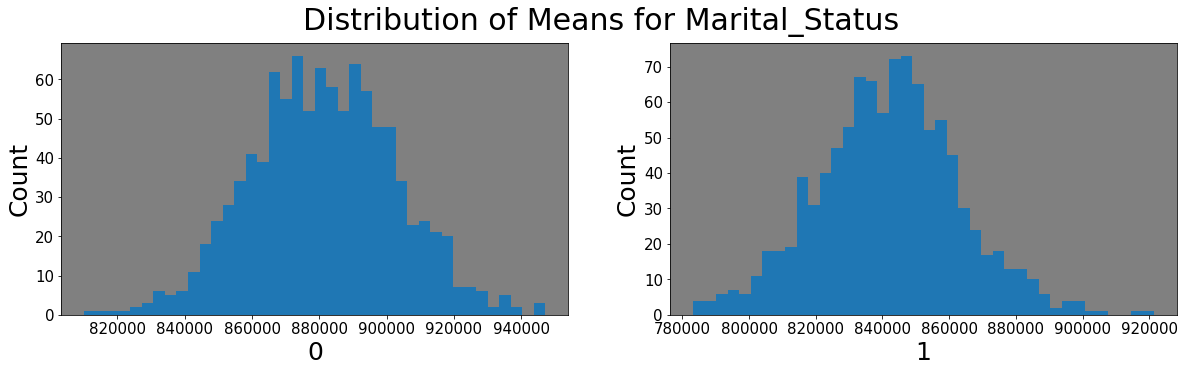

In [53]:
sample_means = create_sample_of_means(2000,purchase_amt_df,'Marital_Status')
display_hist_sample_of_means(sample_means,'Marital_Status')

#### 0 --> Unmarried , 1--> Married

In [54]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Marital_Status')

Population mean for Marital_Status,0 is 881290
Population Standard Error for Marital_Status,0 is 677
Population mean for Marital_Status,1 is 841829
Population Standard Error for Marital_Status,1 is 673


In [55]:
confidence_intervals(pop_mean, pop_std_err,'Marital_Status',1.645,"90%")

Population Mean for Marital_Status,0 at 90% confidence interval lies in [880176,882404]
Population Mean for Marital_Status,1 at 90% confidence interval lies in [840721,842937]


In [56]:
confidence_intervals(pop_mean, pop_std_err,'Marital_Status',1.96,"95%")

Population Mean for Marital_Status,0 at 95% confidence interval lies in [879963,882617]
Population Mean for Marital_Status,1 at 95% confidence interval lies in [840509,843149]


In [57]:
confidence_intervals(pop_mean, pop_std_err,'Marital_Status',2.576,"99%")

Population Mean for Marital_Status,0 at 99% confidence interval lies in [879546,883034]
Population Mean for Marital_Status,1 at 99% confidence interval lies in [840094,843564]


#### Analysing the impact of increasing and decreasing the sample size

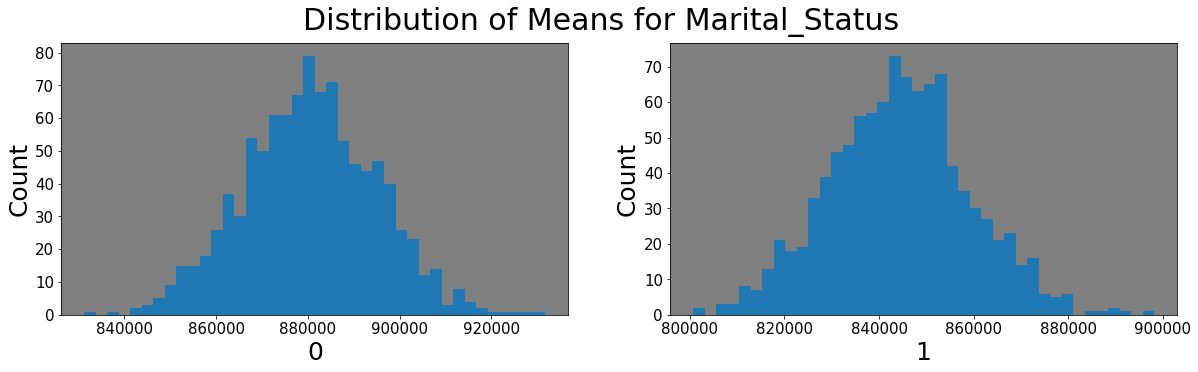

In [86]:
# Sample size is increased to 4000 from 2000
sample_means = create_sample_of_means(4000,purchase_amt_df,'Marital_Status')
display_hist_sample_of_means(sample_means,'Marital_Status')

#### 0 --> Unmarried , 1--> Married

In [87]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Marital_Status')

Population mean for Marital_Status,0 is 880476
Population Standard Error for Marital_Status,0 is 459
Population mean for Marital_Status,1 is 844351
Population Standard Error for Marital_Status,1 is 470


In [88]:
confidence_intervals(pop_mean, pop_std_err,'Marital_Status',1.96,"95%")

Population Mean for Marital_Status,0 at 95% confidence interval lies in [879575,881377]
Population Mean for Marital_Status,1 at 95% confidence interval lies in [843430,845271]


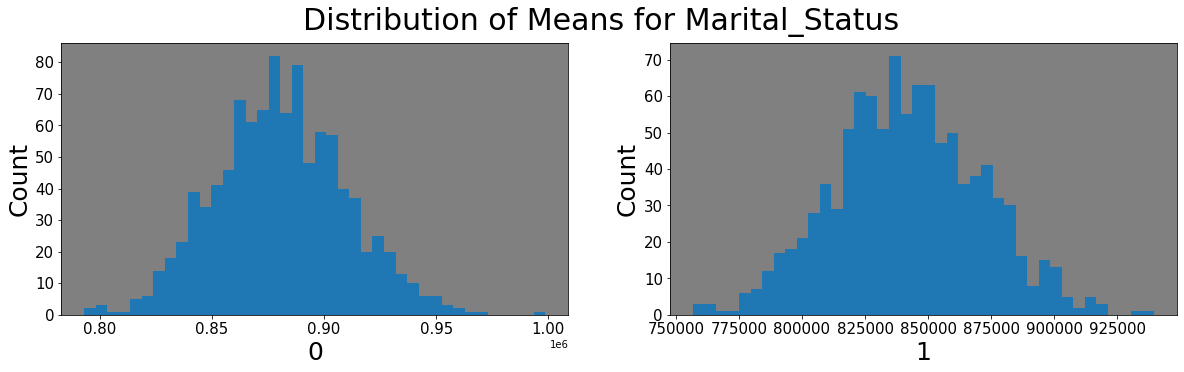

In [89]:
# Sample size is decreased to 1000 from 2000
sample_means = create_sample_of_means(1000,purchase_amt_df,'Marital_Status')
display_hist_sample_of_means(sample_means,'Marital_Status')

#### 0 --> Unmarried , 1--> Married

In [90]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Marital_Status')

Population mean for Marital_Status,0 is 880856
Population Standard Error for Marital_Status,0 is 921
Population mean for Marital_Status,1 is 841780
Population Standard Error for Marital_Status,1 is 930


In [91]:
confidence_intervals(pop_mean, pop_std_err,'Marital_Status',1.96,"95%")

Population Mean for Marital_Status,0 at 95% confidence interval lies in [879051,882662]
Population Mean for Marital_Status,1 at 95% confidence interval lies in [839956,843604]


#### 3.2 Confidence Intervals for Age

In [102]:
# Prepare a dataframe for further analysis
purchase_amt_df = walmart_df.groupby(['User_ID', 'Age'])[['Purchase']].sum().reset_index()
purchase_amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [105]:
# Print Average Amounts spent by Age
for age in purchase_amt_df['Age'].unique():
    print("Average amount spend by {} age group: {:.0f}".format(age,purchase_amt_df[purchase_amt_df['Age']==age]['Purchase'].mean()))

Average amount spend by 0-17 age group: 618868
Average amount spend by 55+ age group: 539697
Average amount spend by 26-35 age group: 989659
Average amount spend by 46-50 age group: 792549
Average amount spend by 51-55 age group: 763201
Average amount spend by 36-45 age group: 879666
Average amount spend by 18-25 age group: 854863


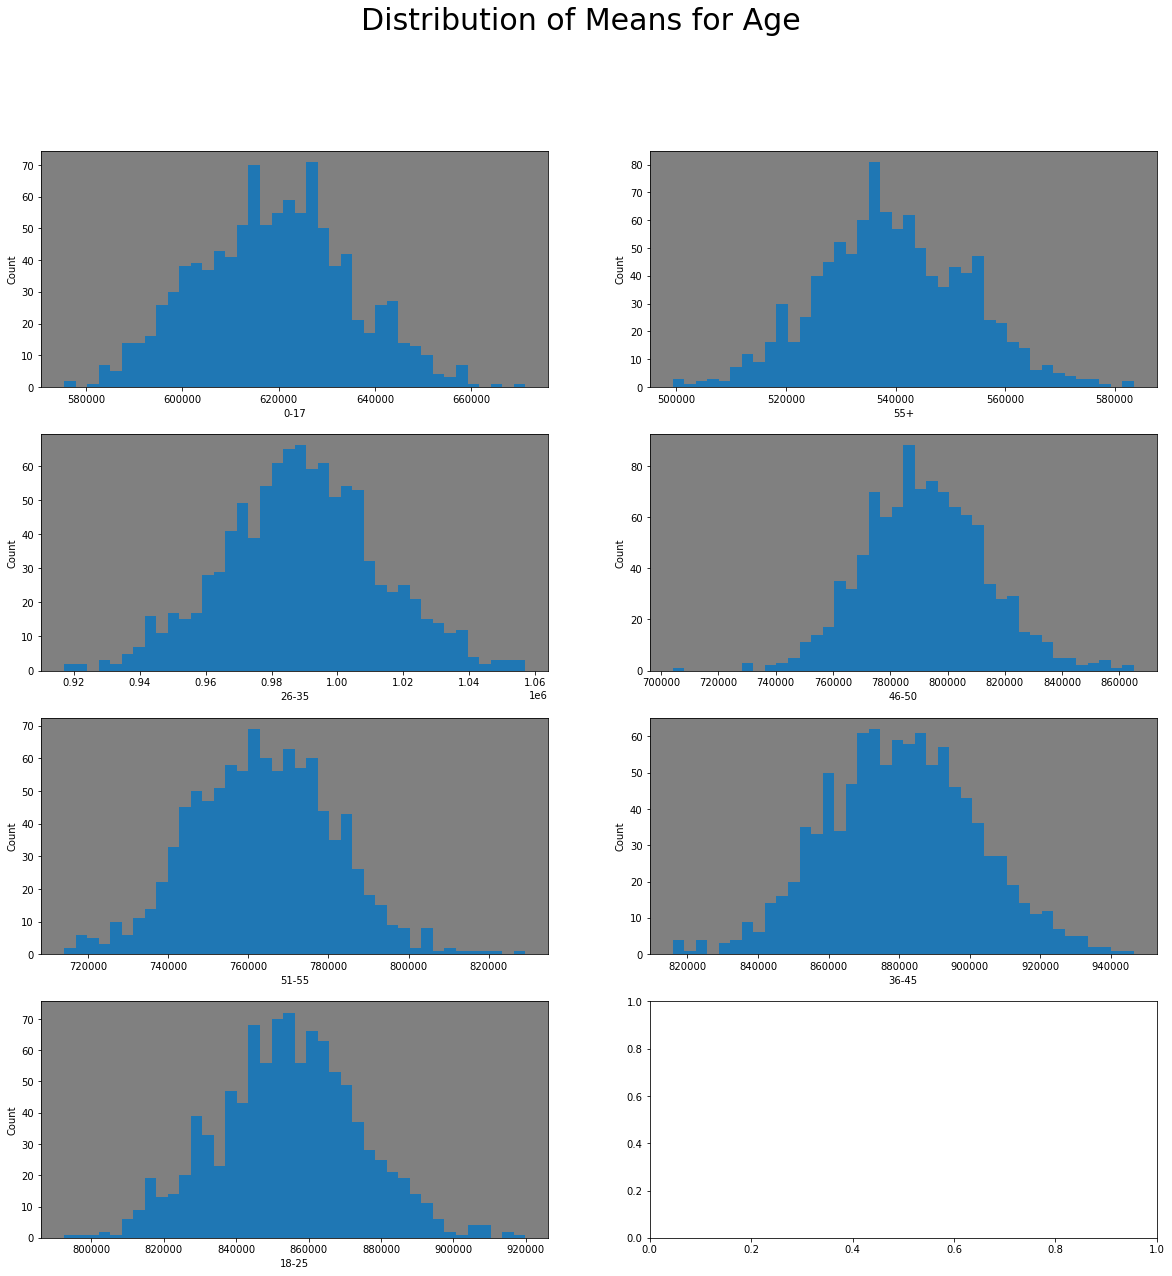

In [70]:
sample_means = create_sample_of_means(2000,purchase_amt_df,'Age')
display_hist_sample_of_means(sample_means,'Age')

In [71]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Age')

Population mean for Age,0-17 is 619013
Population Standard Error for Age,0-17 is 499
Population mean for Age,55+ is 539565
Population Standard Error for Age,55+ is 430
Population mean for Age,26-35 is 989170
Population Standard Error for Age,26-35 is 745
Population mean for Age,46-50 is 792067
Population Standard Error for Age,46-50 is 672
Population mean for Age,51-55 is 763564
Population Standard Error for Age,51-55 is 556
Population mean for Age,36-45 is 880459
Population Standard Error for Age,36-45 is 676
Population mean for Age,18-25 is 854397
Population Standard Error for Age,18-25 is 625


In [72]:
confidence_intervals(pop_mean, pop_std_err,'Age',1.645,"90%")

Population Mean for Age,0-17 at 90% confidence interval lies in [618193,619834]
Population Mean for Age,55+ at 90% confidence interval lies in [538858,540272]
Population Mean for Age,26-35 at 90% confidence interval lies in [987943,990396]
Population Mean for Age,46-50 at 90% confidence interval lies in [790963,793172]
Population Mean for Age,51-55 at 90% confidence interval lies in [762650,764479]
Population Mean for Age,36-45 at 90% confidence interval lies in [879347,881571]
Population Mean for Age,18-25 at 90% confidence interval lies in [853369,855426]


In [73]:
confidence_intervals(pop_mean, pop_std_err,'Age',1.96,"95%")

Population Mean for Age,0-17 at 95% confidence interval lies in [618035,619991]
Population Mean for Age,55+ at 95% confidence interval lies in [538722,540408]
Population Mean for Age,26-35 at 95% confidence interval lies in [987708,990631]
Population Mean for Age,46-50 at 95% confidence interval lies in [790751,793384]
Population Mean for Age,51-55 at 95% confidence interval lies in [762475,764654]
Population Mean for Age,36-45 at 95% confidence interval lies in [879134,881784]
Population Mean for Age,18-25 at 95% confidence interval lies in [853172,855623]


In [74]:
confidence_intervals(pop_mean, pop_std_err,'Age',2.576,"99%")

Population Mean for Age,0-17 at 99% confidence interval lies in [617728,620299]
Population Mean for Age,55+ at 99% confidence interval lies in [538457,540673]
Population Mean for Age,26-35 at 99% confidence interval lies in [987249,991090]
Population Mean for Age,46-50 at 99% confidence interval lies in [790337,793797]
Population Mean for Age,51-55 at 99% confidence interval lies in [762132,764996]
Population Mean for Age,36-45 at 99% confidence interval lies in [878717,882200]
Population Mean for Age,18-25 at 99% confidence interval lies in [852787,856008]


#### Analysing the impact of increasing and decreasing the sample size

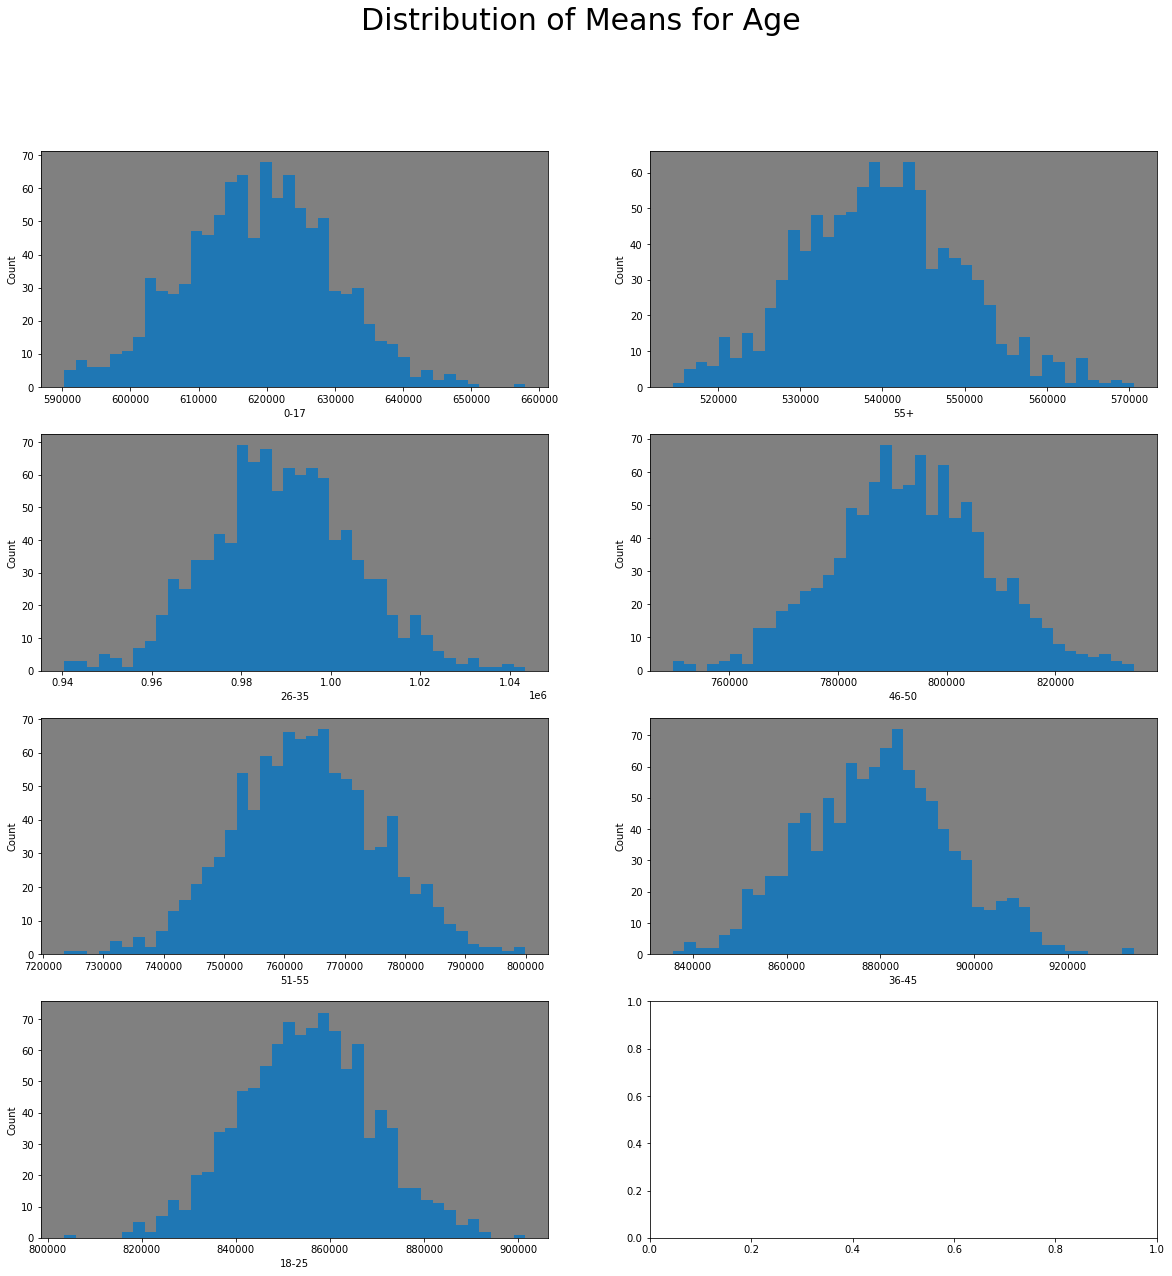

In [96]:
# Sample size is increased to 4000 from 2000
sample_means = create_sample_of_means(4000,purchase_amt_df,'Age')
display_hist_sample_of_means(sample_means,'Age')

In [97]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Age')

Population mean for Age,0-17 is 618709
Population Standard Error for Age,0-17 is 344
Population mean for Age,55+ is 539700
Population Standard Error for Age,55+ is 306
Population mean for Age,26-35 is 989270
Population Standard Error for Age,26-35 is 515
Population mean for Age,46-50 is 793271
Population Standard Error for Age,46-50 is 452
Population mean for Age,51-55 is 763549
Population Standard Error for Age,51-55 is 376
Population mean for Age,36-45 is 879519
Population Standard Error for Age,36-45 is 494
Population mean for Age,18-25 is 855029
Population Standard Error for Age,18-25 is 446


In [98]:
confidence_intervals(pop_mean, pop_std_err,'Age',1.96,"95%")

Population Mean for Age,0-17 at 95% confidence interval lies in [618035,619383]
Population Mean for Age,55+ at 95% confidence interval lies in [539100,540300]
Population Mean for Age,26-35 at 95% confidence interval lies in [988261,990279]
Population Mean for Age,46-50 at 95% confidence interval lies in [792385,794157]
Population Mean for Age,51-55 at 95% confidence interval lies in [762811,764287]
Population Mean for Age,36-45 at 95% confidence interval lies in [878551,880488]
Population Mean for Age,18-25 at 95% confidence interval lies in [854154,855903]


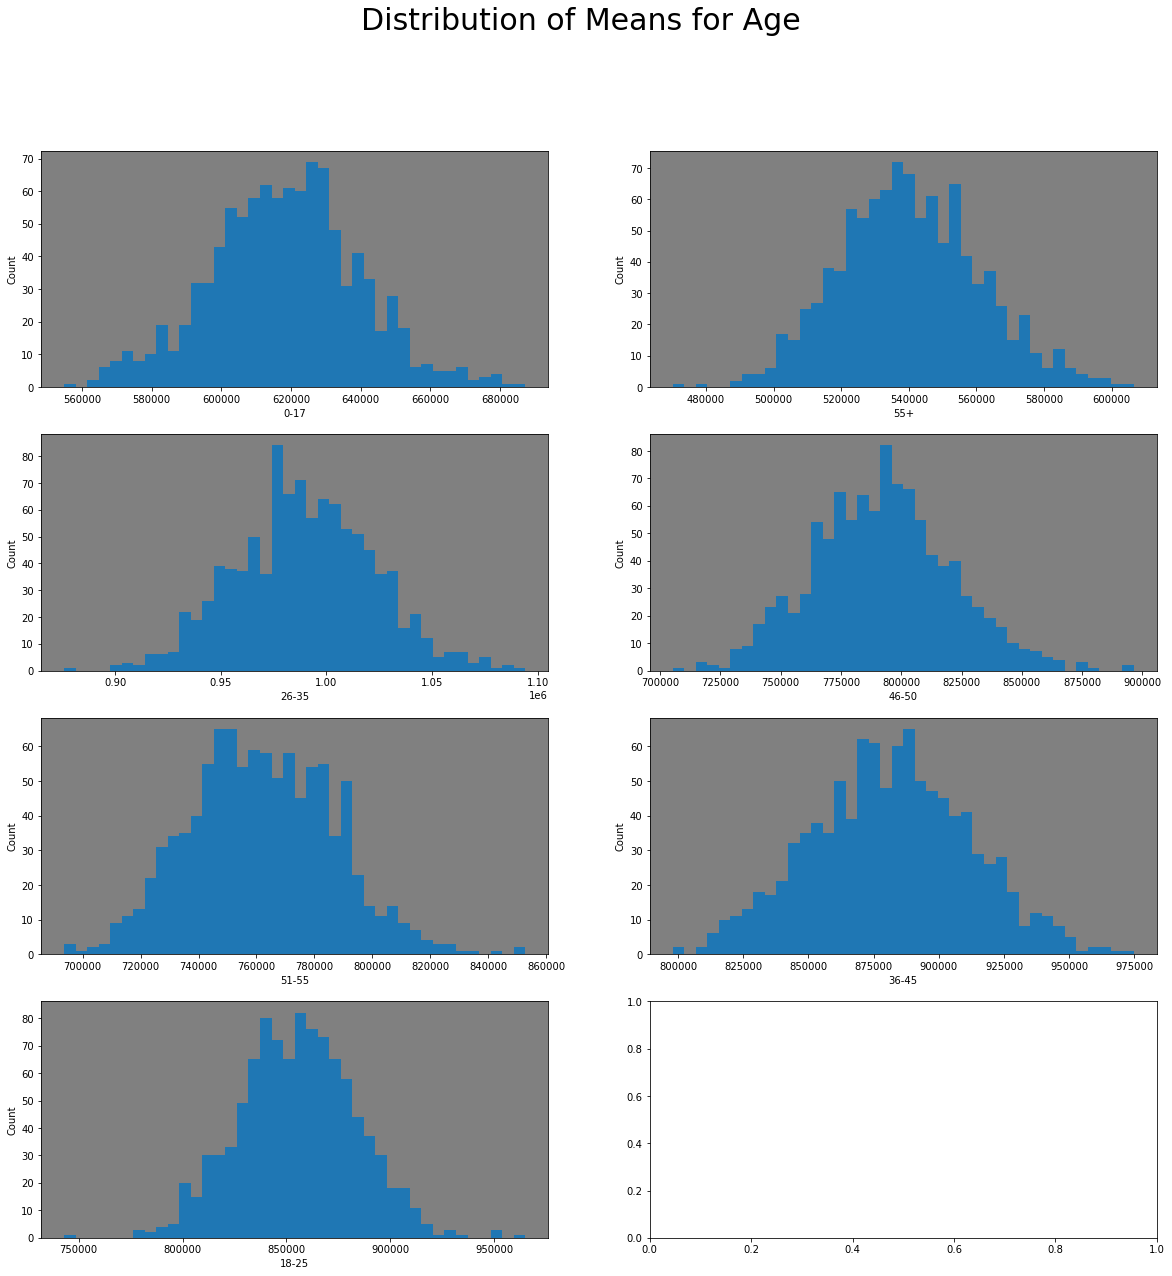

In [99]:
# Sample size is decreased to 1000 from 2000
sample_means = create_sample_of_means(1000,purchase_amt_df,'Age')
display_hist_sample_of_means(sample_means,'Age')

In [100]:
pop_mean, pop_std_err = populaton_mean_std(sample_means,'Age')

Population mean for Age,0-17 is 618189
Population Standard Error for Age,0-17 is 674
Population mean for Age,55+ is 540242
Population Standard Error for Age,55+ is 653
Population mean for Age,26-35 is 989852
Population Standard Error for Age,26-35 is 1032
Population mean for Age,46-50 is 792180
Population Standard Error for Age,46-50 is 907
Population mean for Age,51-55 is 761974
Population Standard Error for Age,51-55 is 783
Population mean for Age,36-45 is 881471
Population Standard Error for Age,36-45 is 960
Population mean for Age,18-25 is 855518
Population Standard Error for Age,18-25 is 890


In [101]:
confidence_intervals(pop_mean, pop_std_err,'Age',1.96,"95%")

Population Mean for Age,0-17 at 95% confidence interval lies in [616867,619510]
Population Mean for Age,55+ at 95% confidence interval lies in [538964,541521]
Population Mean for Age,26-35 at 95% confidence interval lies in [987829,991875]
Population Mean for Age,46-50 at 95% confidence interval lies in [790403,793957]
Population Mean for Age,51-55 at 95% confidence interval lies in [760439,763508]
Population Mean for Age,36-45 at 95% confidence interval lies in [879588,883353]
Population Mean for Age,18-25 at 95% confidence interval lies in [853775,857262]


## Insights

#### Gender
<br>Average amount spend by Male customers: 925344 <br>
<br>Average amount spend by Female customers: 712024<br>

<br> #### Based on CLT, the Average Amounts are ####<br>
<br> Female is 712071 </br>
<br> Male is 924934 </br>

<br> Population Mean for Gender,F at 95% confidence,lies in the interval [712280,713869] <br>
<br> Population Mean for Gender,M at 95% confidence,lies in the interval [924140,926030] <br>

#### Marital Status ####

<br>Average amount spend by Married customers: 843527 <br>
<br>Average amount spend by Single customers: 880576 <br>


<br>#### Based on CLT, the Average Amounts are #### </br>

Single is 881290

Married is 841780


<br>Population Mean for Marital_Status,Single at 95% confidence, interval lies in [879963,882617] <br>
<br>Population Mean for Marital_Status,Married at 95% confidence, interval lies in [840509,843149] <br>

#### Age ####

<br>Average amount spend by 0-17 age group: 618868 </br>
<br>Average amount spend by 18-25 age group: 854863 </br>
<br>Average amount spend by 26-35 age group: 989659 </br>
<br>Average amount spend by 36-45 age group: 879666 </br>
<br>Average amount spend by 46-50 age group: 792549 </br>
<br>Average amount spend by 51-55 age group: 763201 </br>
<br>Average amount spend by 55+ age group: 539697 </br>


<br>#### Based on CLT, the Average Amounts are #### <br>
<br>Age,0-17 is 619013 </br>
<br>Age,18-25 is 854397 </br>
<br>Age,26-35 is 989170 </br>
<br>Age,36-45 is 880459 </br>
<br>Age,46-50 is 792067 </br>
<br>Age,51-55 is 763564 </br>
<br>Age,55+ is 539565 </br>



<br>Population Mean for Age,0-17 at 95% confidence interval lies in [618035,619991] </br>
<br>Population Mean for Age,18-25 at 95% confidence interval lies in [853172,855623] </br>
<br>Population Mean for Age,26-35 at 95% confidence interval lies in [987708,990631] </br>
<br>Population Mean for Age,36-45 at 95% confidence interval lies in [879134,881784]</br>
<br>Population Mean for Age,46-50 at 95% confidence interval lies in [790751,793384]</br>
<br>Population Mean for Age,51-55 at 95% confidence interval lies in [762475,764654]</br>
<br>Population Mean for Age,55+ at 95% confidence interval lies in [538722,540408]</br>





#### In all three cases we observe that ####

##### Change of Confidence Interval ##### 
: As you increase the confidence level, the interval widens, and the interval shortens on decreasing the confidence 
interval

##### Change of Sample size ##### 
<br> Owing to the presence of the n^1/2 term in the formula for an interval estimate, the sample size affects the margin of error. Larger sample sizes lead to smaller margins of error. This observation forms the basis for procedures used to select the sample size. Sample sizes can be chosen such that the confidence interval satisfies any desired requirements about the size of the margin of error. </br>

### Recommendations ###

<br>1.Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.</br>

2.Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.

3.Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

4.Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45